<a href="https://colab.research.google.com/github/zqiaohe/100daysofcode/blob/master/Whales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import copy
import os
from tqdm import tnrange, tqdm_notebook as tqdm

In [0]:
!pip3 install kaggle

In [0]:
user = 'qiaohe'
key = '6992d820d95bfc00100fdab824b8ccbb'
 
if '.kaggle' not in os.listdir('/root'):
    !mkdir ~/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 666 /root/.kaggle/kaggle.json
with open('/root/.kaggle/kaggle.json', 'w') as f:
    f.write('{"username":"%s","key":"%s"}' % (user, key))
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c humpback-whale-identification

  0% 0.00/498k [00:00<?, ?B/s]
100% 498k/498k [00:00<00:00, 61.2MB/s]
  0% 0.00/594k [00:00<?, ?B/s]
100% 594k/594k [00:00<00:00, 80.5MB/s]
 99% 1.34G/1.35G [00:12<00:00, 148MB/s]
100% 1.35G/1.35G [00:12<00:00, 112MB/s]
100% 4.15G/4.16G [00:42<00:00, 129MB/s]
100% 4.16G/4.16G [00:42<00:00, 105MB/s]


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [0]:
import numpy as np

In [0]:
!unzip train.zip -d train 

Archive:  train.zip
  inflating: train/1cb7e70be.jpg     
  inflating: train/85fbaaeee.jpg     
  inflating: train/0df6c0ada.jpg     
  inflating: train/b45879784.jpg     
  inflating: train/667c90122.jpg     
  inflating: train/d78425146.jpg     
  inflating: train/52fb69ef4.jpg     
  inflating: train/e6b70421a.jpg     
  inflating: train/57c35256c.jpg     
  inflating: train/fdda50025.jpg     
  inflating: train/b642373be.jpg     
  inflating: train/38d49de1f.jpg     
  inflating: train/e0bc48ac2.jpg     
  inflating: train/4e2cf9e48.jpg     
  inflating: train/5c5e91098.jpg     
  inflating: train/d6a6539af.jpg     
  inflating: train/d102de015.jpg     
  inflating: train/3308c3a19.jpg     
  inflating: train/dfbcd5e5b.jpg     
  inflating: train/b5bf598c6.jpg     
  inflating: train/665c7dade.jpg     
  inflating: train/1a9116d41.jpg     
  inflating: train/2b4a4e5f7.jpg     
  inflating: train/00fee3975.jpg     
  inflating: train/fad7fd94b.jpg     
  inflating: train/6c6895185.j

In [0]:
!unzip test.zip -d test

Archive:  test.zip
  inflating: test/8025e1774.jpg      
  inflating: test/18314d823.jpg      
  inflating: test/ecad2e839.jpg      
  inflating: test/262f5cb0c.jpg      
  inflating: test/0f89e1816.jpg      
  inflating: test/0fe281ec5.jpg      
  inflating: test/4e09edc85.jpg      
  inflating: test/3180e1cd5.jpg      
  inflating: test/8900e3f78.jpg      
  inflating: test/92835da1f.jpg      
  inflating: test/5d0ca9ac4.jpg      
  inflating: test/b73949ea6.jpg      
  inflating: test/c3957db12.jpg      
  inflating: test/bd0479d5b.jpg      
  inflating: test/8e0176731.jpg      
  inflating: test/af8c742cc.jpg      
  inflating: test/10e7f2656.jpg      
  inflating: test/49069f906.jpg      
  inflating: test/39a6f1f53.jpg      
  inflating: test/eb48c38b4.jpg      
  inflating: test/ba767954f.jpg      
  inflating: test/72d77d558.jpg      
  inflating: test/9d6e1a0a0.jpg      
  inflating: test/580722429.jpg      
  inflating: test/78bdc0575.jpg      
  inflating: test/4f3ea827d.jpg

In [0]:
TRAIN_PATH = "train/"
train_files = list(os.listdir(TRAIN_PATH))[100:]
f = TRAIN_PATH+train_files[1]

In [0]:
im = mpimg.imread(f)
im.shape

(652, 1000, 3)

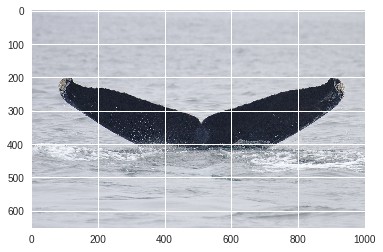

In [0]:
plt.imshow(im)
plt.show()

In [0]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [0]:
import pandas as pd 

In [0]:
trainalldf = pd.read_csv("train.csv")

In [0]:
trainalldf.count()

Image    25361
Id       25361
dtype: int64

In [0]:
whaleids = sorted(list(trainalldf['Id'].drop_duplicates()))
print(whaleids[:5]); print(len(whaleids))

['new_whale', 'w_0003639', 'w_0003c59', 'w_0027efa', 'w_00289b1']
5005


In [0]:
whaleids_dict = dict((k,v) for v,k in enumerate(whaleids))

In [0]:
whaleids_dict = dict((k,v) for v,k in enumerate(whaleids))

In [0]:
BS = 16
image_input_size = 224
densenet = torchvision.models.densenet121(pretrained=True)
for p in densenet.parameters():
    p.requires_grad = False # Freeze all existing layers

/usr/local/lib/python3.6/dist-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


In [0]:
densenet.fc = nn.Linear(512, len(whaleids))

In [0]:
densenet.to('cuda')

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplac

In [0]:
norm = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.255],
    std=[1/0.229, 1/0.224, 1/0.255]
)

transforms_dict = {
    'train': transforms.Compose([transforms.RandomResizedCrop(image_input_size),
                                 transforms.RandomHorizontalFlip(),
                                 transforms.ToTensor(),
                                 norm]),
    'val': transforms.Compose([transforms.Resize(image_input_size),
                                 transforms.CenterCrop(image_input_size),
                                 transforms.ToTensor(),
                                 norm])
}

In [0]:
class WhaleImageDataset(torchvision.datasets.folder.ImageFolder):
    def __init__(self, ROOT_PATH, tfm, images, targets=None):
        self.ROOT_PATH = ROOT_PATH
        self.images = images
        self.targets = targets
        self.trans = tfm
        self.loader = torchvision.datasets.folder.default_loader
    
    def __getitem__(self, index):
        f = self.ROOT_PATH + self.images[index]
        im = self.loader(f)
        if self.targets is None: # Test mode has no targets
            return self.trans(im)
        return self.trans(im), self.targets[index]
    
    def __len__(self):
        return len(self.images)

In [0]:
trainallimages = trainalldf['Image'].values
trainallids = trainalldf['Id'].values
trainallclasses = np.array([whaleids_dict[id] for id in trainallids])

In [0]:
from sklearn.model_selection import ShuffleSplit

In [0]:
splitter = ShuffleSplit(n_splits=1, test_size=0.25)
(train_idxs, val_idxs) = next(splitter.split(trainallimages, trainallclasses))
idxs = {'train': train_idxs, 'val': val_idxs}

In [0]:
images_dict = {phase: trainallimages[idxs[phase]] for phase in ['train', 'val']}
classes_dict = {phase: trainallclasses[idxs[phase]] for phase in ['train', 'val']}

In [0]:
datasets_dict = {phase: WhaleImageDataset(TRAIN_PATH, transforms_dict[phase], images_dict[phase], classes_dict[phase]) for phase in ['train','val']}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224])
torch.Size([224, 224, 3])


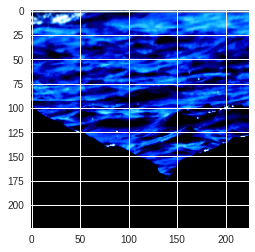

In [0]:
im, c = datasets_dict['train'][1]
print(im.shape)
im = im.permute(1,2,0)
im2 = inv_normalize(im)
print(im2.shape)
plt.imshow(im2)
plt.show()

In [0]:
#train_dl = torch.utils.data.DataLoader(train_image_dataset, batch_size=BS, shuffle=True, num_workers=4)
#val_dl = torch.utils.data.DataLoader(val_image_dataset, batch_size=BS, shuffle=True, num_workers=4)
dataloaders_dict = {phase: torch.utils.data.DataLoader(datasets_dict[phase], batch_size=BS, shuffle=True, num_workers=1, pin_memory=True) 
                    for phase in ['train', 'val']}

In [0]:
opt = torch.optim.SGD(densenet.fc.parameters(), lr=0.001, momentum=0.9)
crit = nn.CrossEntropyLoss()

In [0]:
NUM_EPOCHS = 1

val_acc_history = []

best_model_wts = copy.deepcopy(densenet.state_dict())
best_acc = 0.0

for epoch in range(NUM_EPOCHS):
    print('Epoch {}/{}'.format(epoch, NUM_EPOCHS - 1))
    print('-' * 10)
    
    for phase in ['train', 'val']:
        if phase == 'train':
            densenet.train()
        else:
            densenet.eval()
        
        running_loss = 0.0
        running_corrects = 0
            
        for X_batch, y_batch in dataloaders_dict[phase]:
            X_batch = X_batch.to('cuda')
            y_batch = y_batch.to('cuda')
            
            opt.zero_grad()
            
            outputs = densenet(X_batch)
            
            loss = crit(outputs, y_batch)
            
            _, preds = torch.max(outputs, 1)
            
            if phase == 'train':
                loss.backward()
                opt.step()
                
            running_loss += loss.item() * X_batch.size(0)
            running_corrects += torch.sum(preds == y_batch.data)
            
        epoch_loss = running_loss / len(dataloaders_dict[phase].dataset)
        epoch_acc = running_corrects.double() / len(dataloaders_dict[phase].dataset)
        
        if phase == 'val' and epoch_acc > best_acc:
            best_acc = epoch_acc
            best_model_wts = copy.deepcopy(resnet18.state_dict())
        if phase == 'val':
            val_acc_history.append(epoch_acc)
        
        print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))     

    print('\n')
    
print('Best acc: {:.4f}'.format(best_acc))
resnet18.load_state_dict(best_model_wts)

RuntimeError: ignored

In [0]:
for epoch in range(NUM_EPOCHS):
    print('Epoch {}/{}'.format(epoch, NUM_EPOCHS - 1))
    print('-' * 10)
    
    for phase in ['train', 'val']:
        if phase == 'train':
            resnet18.train()
        else:
            resnet18.eval()
        
        running_loss = 0.0
        running_corrects = 0
            
        for X_batch, y_batch in dataloaders_dict[phase]:
            X_batch = X_batch.to('cuda')
            y_batch = y_batch.to('cuda')
            
            opt.zero_grad()
            
            outputs = resnet18(X_batch)
            
            loss = crit(outputs, y_batch)
            
            _, preds = torch.max(outputs, 1)
            
            if phase == 'train':
                loss.backward()
                opt.step()
                
            running_loss += loss.item() * X_batch.size(0)
            running_corrects += torch.sum(preds == y_batch.data)
            
        epoch_loss = running_loss / len(dataloaders_dict[phase].dataset)
        epoch_acc = running_corrects.double() / len(dataloaders_dict[phase].dataset)
        
        if phase == 'val' and epoch_acc > best_acc:
            best_acc = epoch_acc
            best_model_wts = copy.deepcopy(resnet18.state_dict())
        if phase == 'val':
            val_acc_history.append(epoch_acc)
        
        print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))     

    print('\n')
    
print('Best acc: {:.4f}'.format(best_acc))
resnet18.load_state_dict(best_model_wts)

Epoch 0/0
----------


RuntimeError: ignored

In [0]:
TEST_PATH = "test/"
images_test = list(os.listdir(TEST_PATH))
dataset_test = WhaleImageDataset(TEST_PATH, transforms_dict['val'], images_test)
dataloader_test = torch.utils.data.DataLoader(dataset_test, batch_size=BS, shuffle=False, num_workers=1, pin_memory=True)

In [0]:
test_classnames = []
for test_batch in tqdm(dataloader_test):
    test_batch = test_batch.to('cuda')
    outputs =densenet(test_batch)
    _, preds = torch.max(outputs, 1)
    
    test_classnames.extend([whaleids[c] for c in preds])

In [0]:
testdf = pd.DataFrame({'Image': images_test, 'Id': test_classnames})

In [0]:
testdf.to_csv('submission.csv', index=False)